In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [2]:
file_path = 'data/customers-100000.csv'
customer_df = pd.read_csv(file_path)
print("List of Column: ",customer_df.columns.tolist())
customer_df = customer_df.drop(columns=['Index'])
total_rows = len(customer_df)
print("Total number of rows:", total_rows)

List of Column:  ['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City', 'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date', 'Website']
Total number of rows: 100000


In [3]:
customer_df.head(20)

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/
1,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/
2,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/
3,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/
4,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/
5,75bEe1B33E517AF,Frank,Villarreal,"Craig, Dennis and Maddox",Reidtown,Panama,+1-165-340-7100x44099,(847)867-2795x043,gmurillo@perez.com,2022-01-13,https://patel.org/
6,CB8b29B8Fbbbe58,Rickey,Fox,"Benson, Gray and Fitzpatrick",Mcintoshberg,United States of America,426.446.3838,437.476.4705,melissabenitez@le.info,2021-11-05,http://www.irwin-donaldson.com/
7,56b3cEA1E6A49F1,Barry,Ware,Glenn Ltd,Lake Pedrofort,American Samoa,101-419-0208x043,931.542.3115x98926,brent60@lopez.com,2022-05-12,https://www.bean.biz/
8,f9443f5f6AF0Da0,Carl,Mcdowell,Davila-Leach,Petersbury,Saint Vincent and the Grenadines,+1-740-392-0511,+1-218-891-5403x7270,toddharris@lowery-rosario.biz,2022-05-28,https://www.burnett.com/
9,C99b63E0d92C565,Pam,Dalton,Mckenzie Ltd,Hillside,Tanzania,0389689232,344-952-1181x6911,carolbanks@vang-stafford.com,2022-03-04,http://www.maxwell-bradford.com/


In [4]:
missing_values = customer_df.isnull().sum()

print("Missing values per column:")
print(missing_values)


Missing values per column:
Customer Id          0
First Name           0
Last Name            0
Company              0
City                 0
Country              0
Phone 1              0
Phone 2              0
Email                0
Subscription Date    0
Website              0
dtype: int64


In [5]:
unique_companies = customer_df['Company'].dropna().unique()
print("Unique Companies Count:", len(unique_companies))

unique_cities = customer_df['City'].dropna().unique()
print("Unique Cities Count:", len(unique_cities))

unique_countries = customer_df['Country'].dropna().unique()
print("Unique Countries Count:", len(unique_countries))

Unique Companies Count: 71994
Unique Cities Count: 49154
Unique Countries Count: 243


In [6]:
company_counts = customer_df['Company'].value_counts(dropna=True)
print("Company Counts:")
print(company_counts)

# Count of entries per City
city_counts = customer_df['City'].value_counts(dropna=True)
print("\nCity Counts:")
print(city_counts)

# Count of entries per Country
country_counts = customer_df['Country'].value_counts(dropna=True)
print("\nCountry Counts:")
print(country_counts)

Company Counts:
Company
Campbell Ltd                  17
Wilkerson Ltd                 17
Booker and Sons               16
Acosta Ltd                    16
Mccarty and Sons              15
                              ..
Delgado-Daniels                1
Wright, Erickson and Wells     1
Bryant-Jordan                  1
Rubio-Sutton                   1
Henry, Murray and Gomez        1
Name: count, Length: 71994, dtype: int64

City Counts:
City
Lake Frederick       16
East Jeremy          15
East Lee             15
West Alec            15
New Christopher      15
                     ..
South Ericaberg       1
North Dorothyberg     1
Sloanfort             1
Jeanetteport          1
Goodwinton            1
Name: count, Length: 49154, dtype: int64

Country Counts:
Country
Congo               835
Korea               820
Saudi Arabia        463
Pitcairn Islands    456
Saint Martin        453
                   ... 
Moldova             371
Jordan              365
Saint Lucia         365
Sloveni

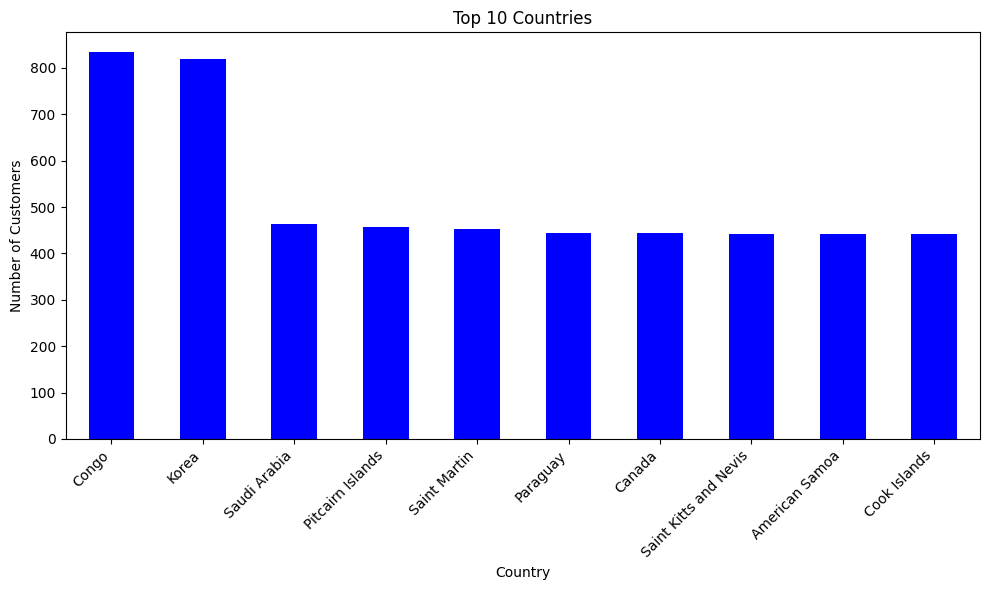

In [ ]:

# Top N to display
top_n = 10

top_countries = customer_df['Country'].value_counts().head(top_n)
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='blue')
plt.title(f'Top {top_n} Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


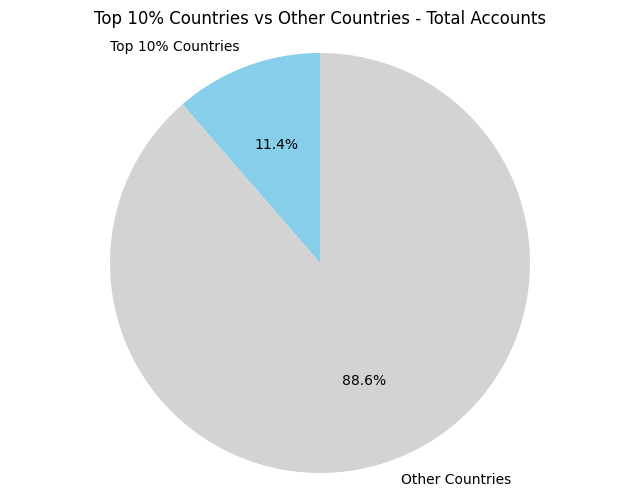

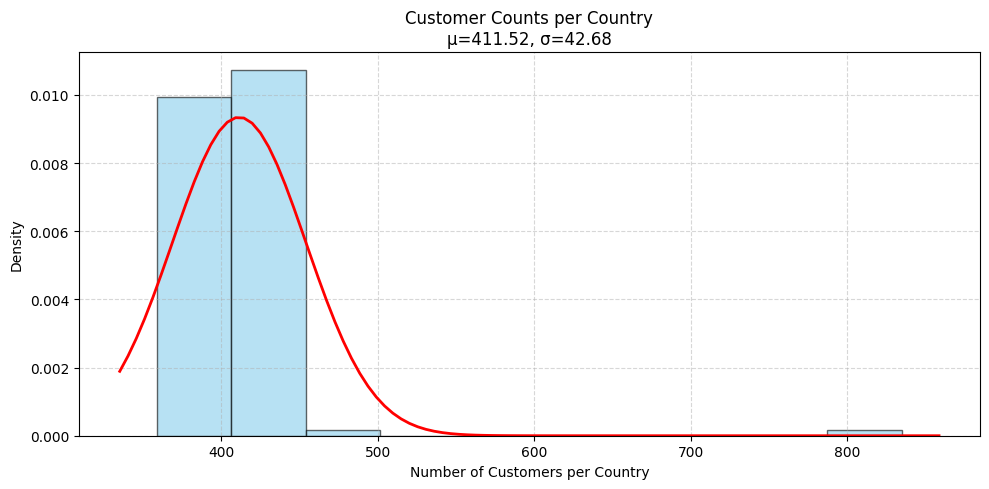

In [ ]:
top_k = int(0.1*len(country_counts))
top_countries_sum = country_counts.head(top_k).sum()

# Sum of all other countries
other_sum = country_counts.iloc[top_k:].sum()

# Prepare data for pie chart
pie_data = [top_countries_sum, other_sum]
labels = [f'Top 10% Countries', 'Other Countries']

# Plot
plt.figure(figsize=(8,6))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'], startangle=90)
plt.title(f'Top 10% Countries vs Other Countries - Total Accounts')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()



mu = country_counts.mean()
std = country_counts.std()


plt.figure(figsize=(10,5))
plt.hist(country_counts, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'Customer Counts per Country\nμ={mu:.2f}, σ={std:.2f}')
plt.xlabel('Number of Customers per Country')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

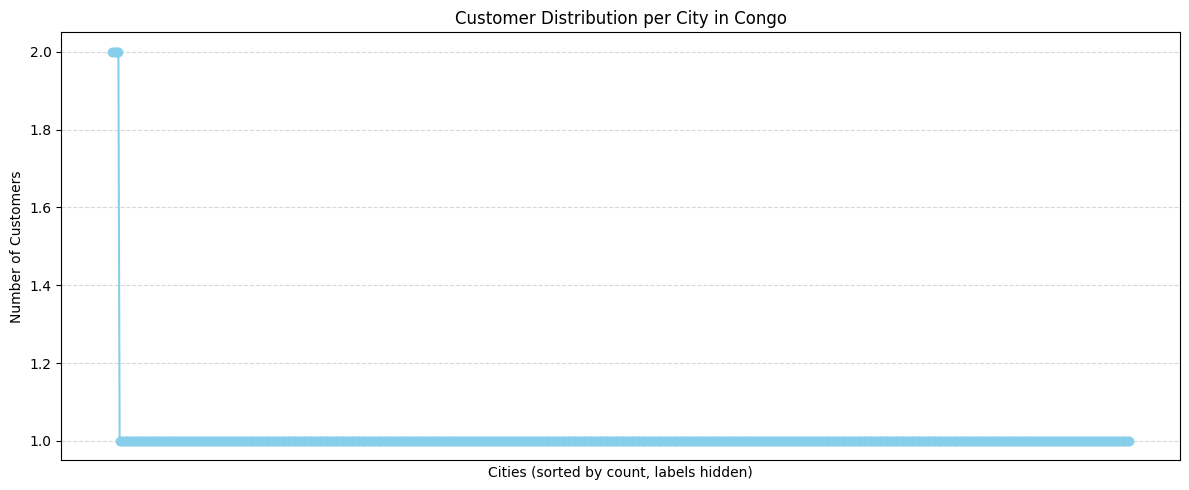

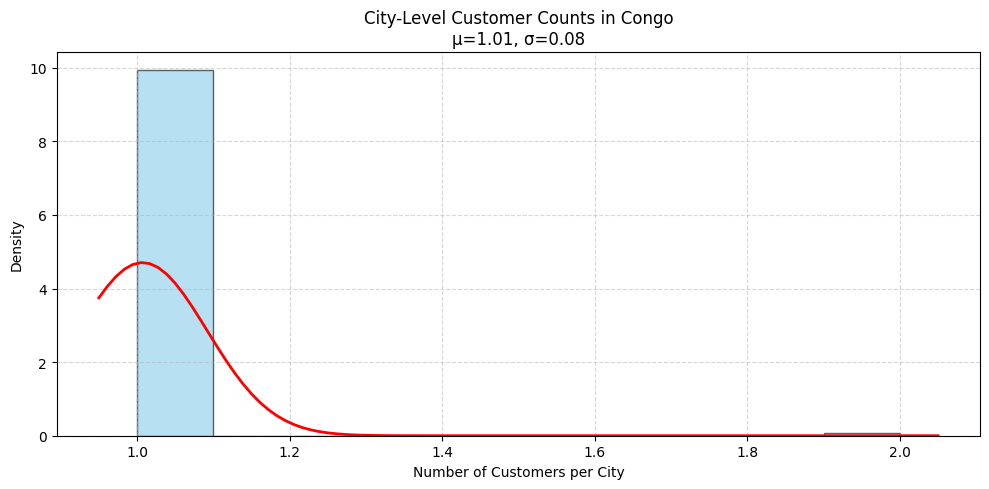

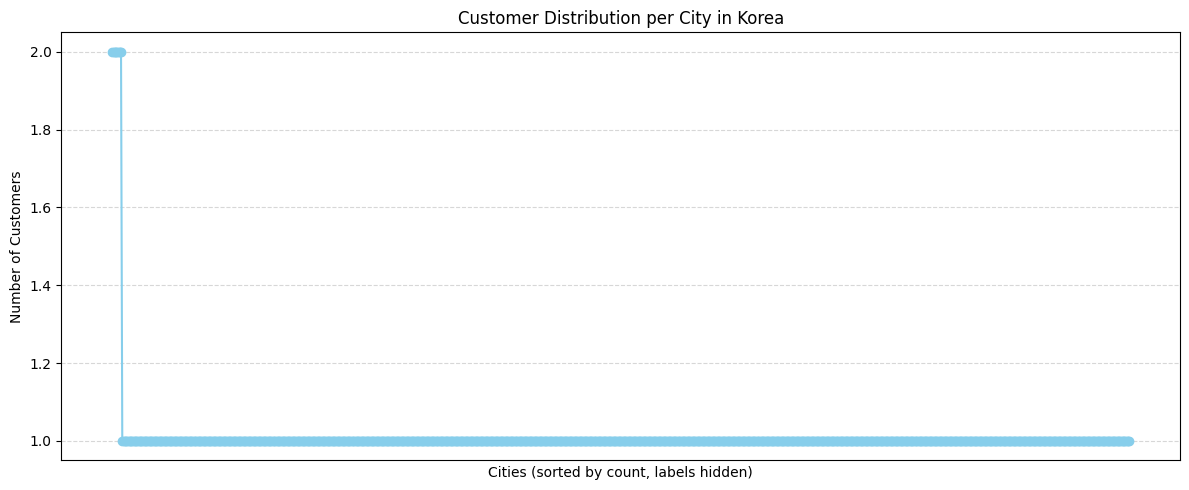

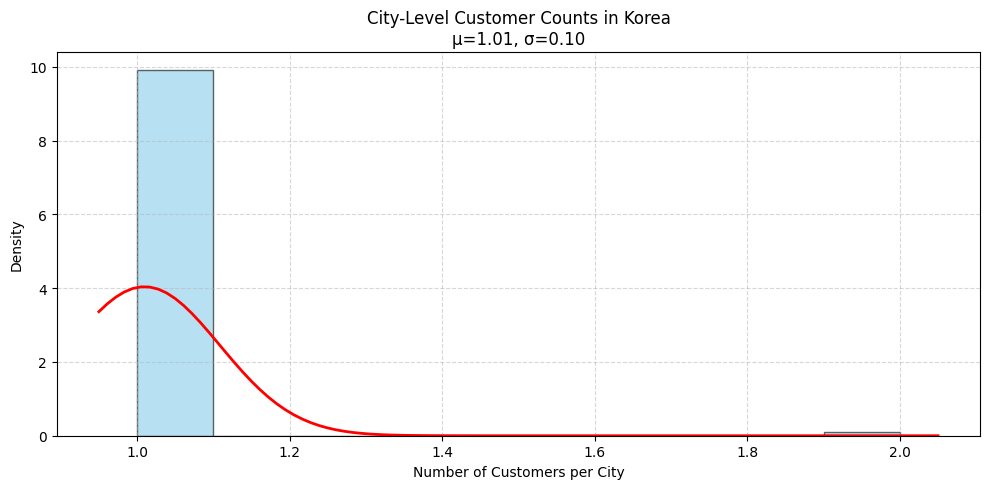

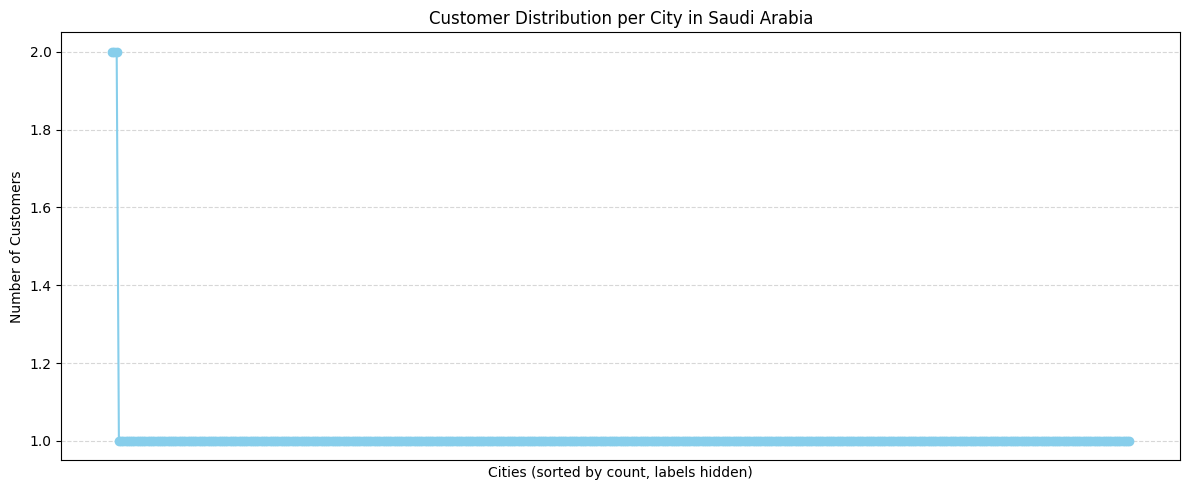

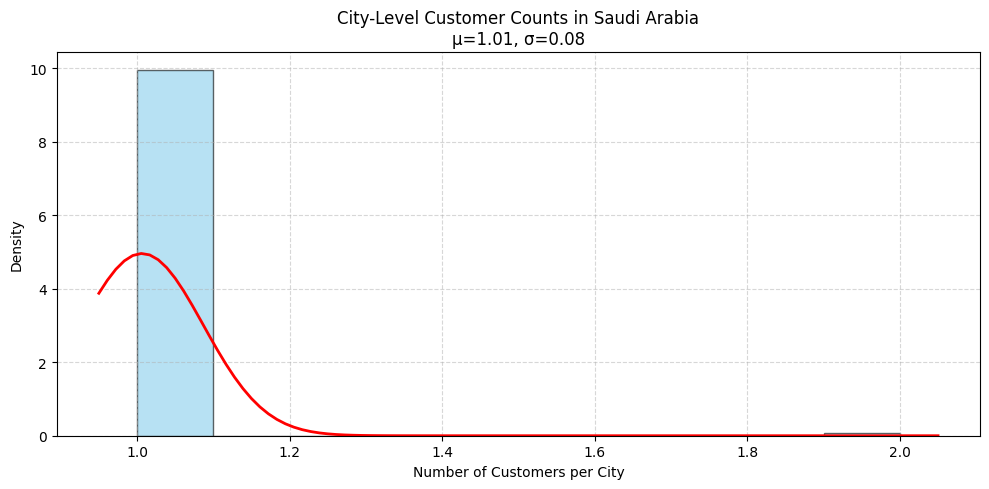

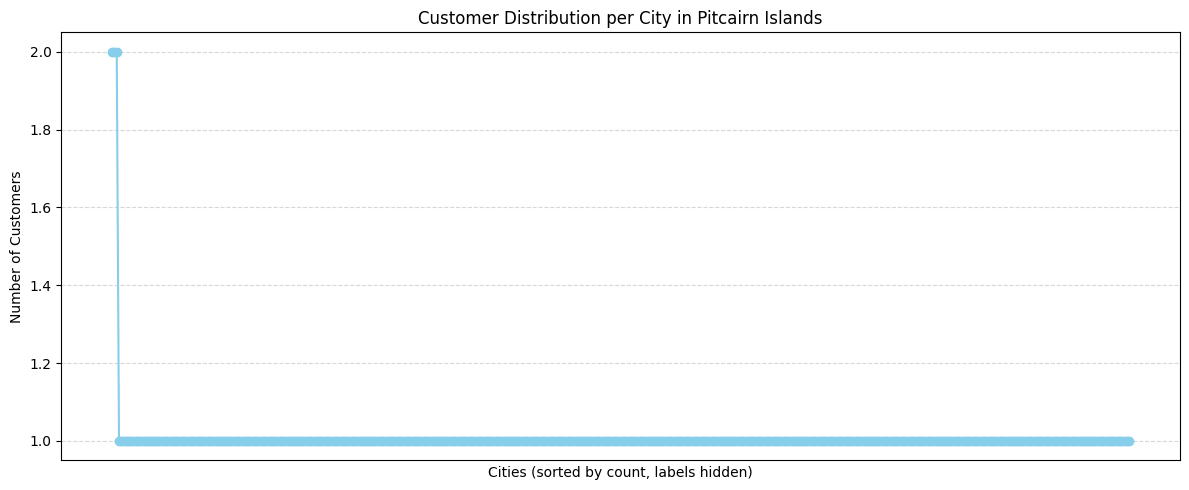

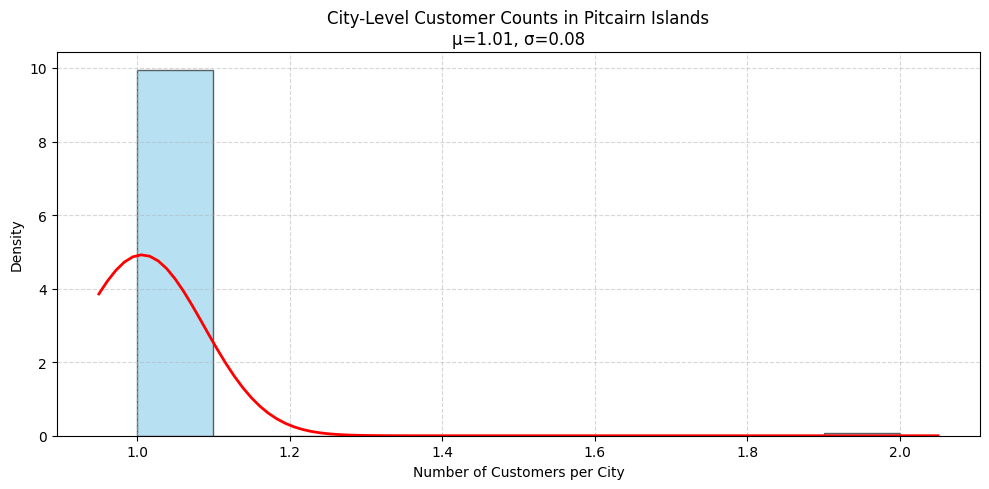

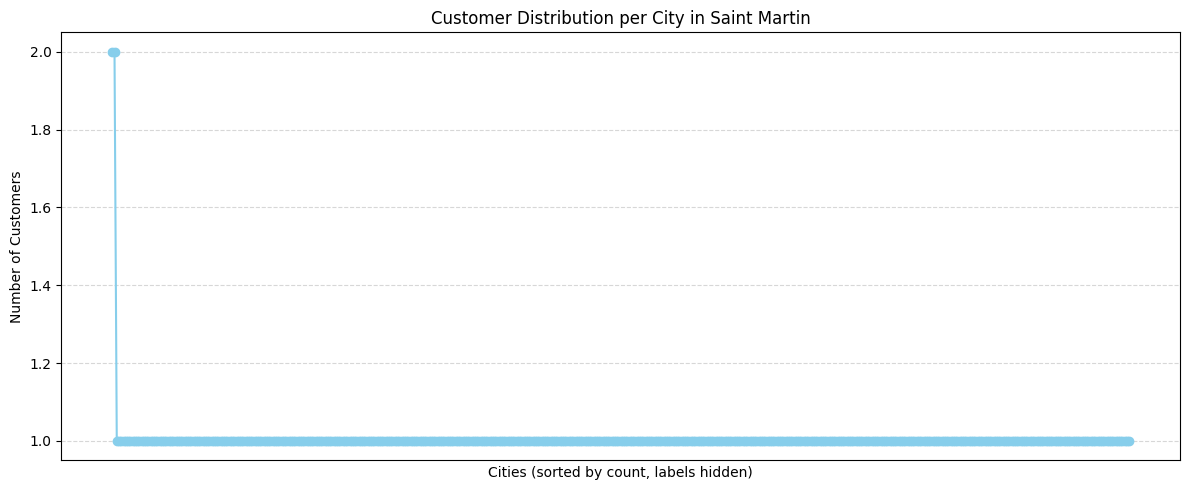

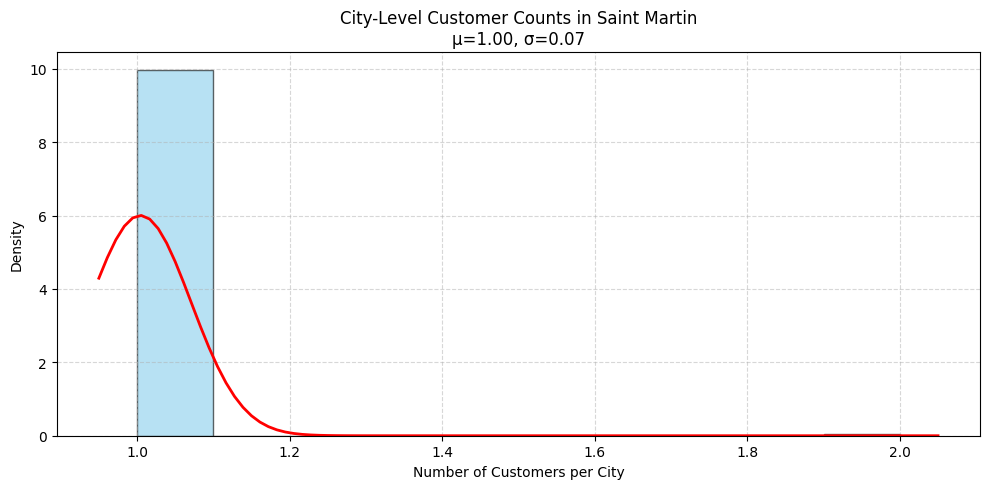


Average μ (mean) across sampled countries: 1.01
Average σ (std) across sampled countries: 0.08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mus, stds = [] , []

top_n = 5
top_countries = customer_df['Country'].value_counts().head(top_n).index.tolist()

for country in top_countries:
    # Get city-level customer counts for this country
    city_counts = customer_df[customer_df['Country'] == country]['City'].value_counts()
    data = city_counts.values

    # Skip if fewer than 2 cities
    if len(data) < 2:
        continue

    # City distribution plot
    plt.figure(figsize=(12,5))
    plt.plot(data, marker='o', linestyle='-', color='skyblue')
    plt.title(f'Customer Distribution per City in {country}')
    plt.xlabel('Cities (sorted by count, labels hidden)')
    plt.ylabel('Number of Customers')
    plt.xticks([])  # Hide city names
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Fit normal distribution
    mu, std = norm.fit(data)
    mus.append(mu)
    stds.append(std)

    # Histogram with normal fit
    plt.figure(figsize=(10,5))
    plt.hist(data, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Normal curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f'City-Level Customer Counts in {country}\nμ={mu:.2f}, σ={std:.2f}')
    plt.xlabel('Number of Customers per City')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Summary statistics
if mus and stds:
    avg_mu = np.mean(mus)
    avg_std = np.mean(stds)
    print(f"\nAverage μ (mean) across sampled countries: {avg_mu:.2f}")
    print(f"Average σ (std) across sampled countries: {avg_std:.2f}")
else:
    print("\nNot enough data to compute averages.")




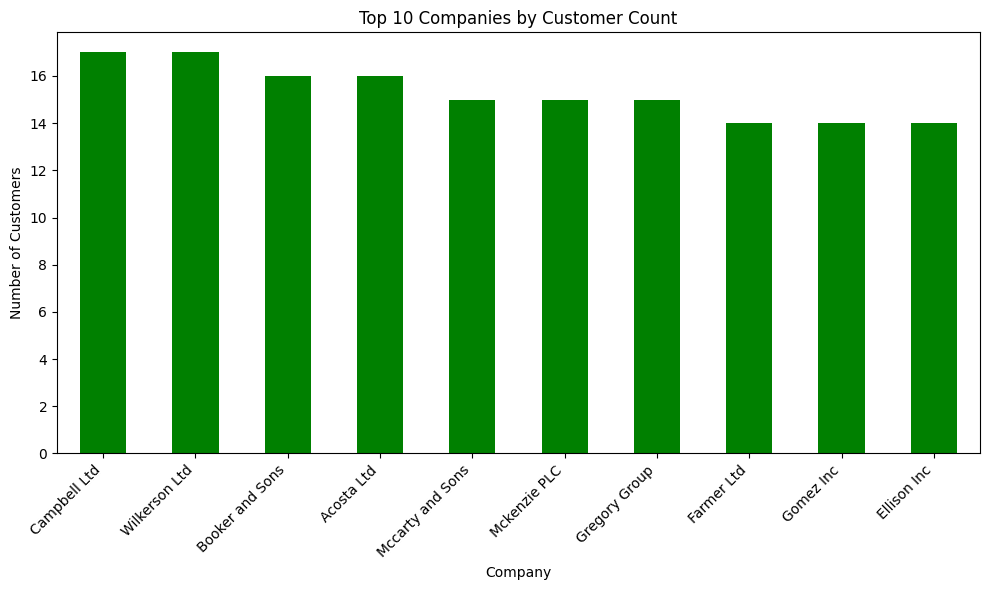

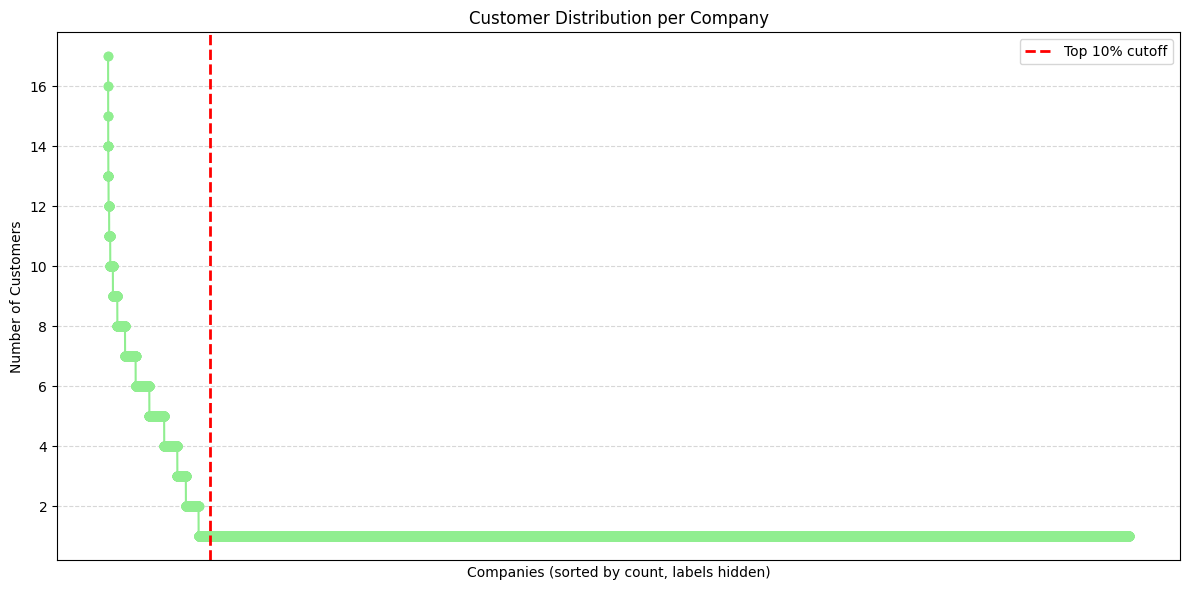

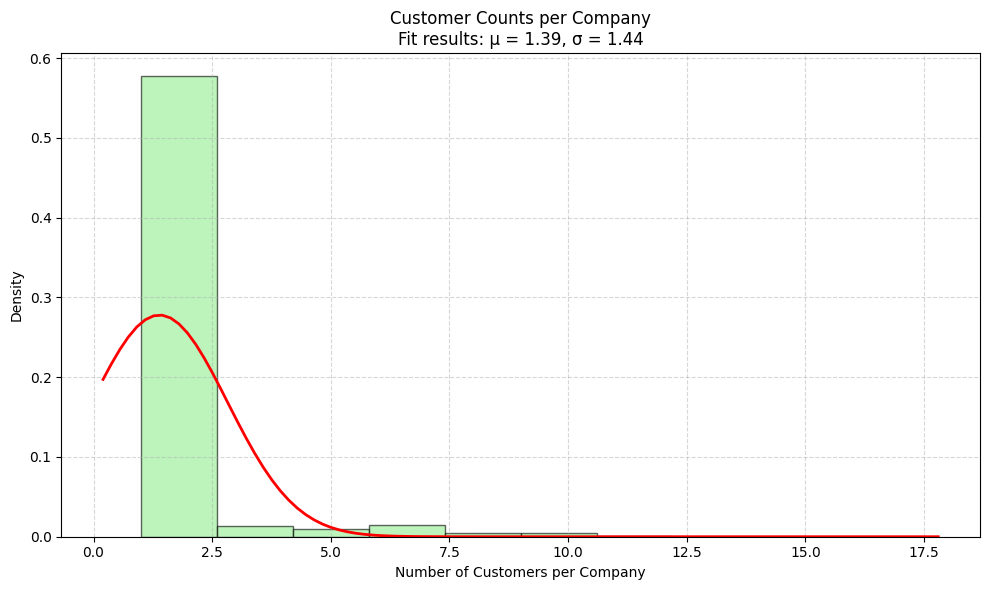

In [ ]:

top_n = 10
top_k = int(0.1*len(company_counts))

# Top 10%
top_companies = customer_df['Company'].value_counts().head(top_n)
plt.figure(figsize=(10,6))
top_companies.plot(kind='bar', color='green')
plt.title(f'Top {top_n} Companies by Customer Count')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Company distribution plot
company_counts = customer_df['Company'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.plot(company_counts.values, marker='o', linestyle='-', color='lightgreen')
plt.title('Customer Distribution per Company')
plt.xlabel('Companies (sorted by count, labels hidden)')
plt.ylabel('Number of Customers')
plt.xticks([])  # Hide x-axis labels
plt.grid(True, linestyle='--', alpha=0.5)

# Vertical line after top N companies
plt.axvline(x=top_k-0.5, color='red', linestyle='--', linewidth=2, label='Top 10% cutoff')
plt.legend()
plt.tight_layout()
plt.show()

# Normal distribution fit for company counts
data = company_counts.values

# Fit normal distribution
mu, std = norm.fit(data)

plt.figure(figsize=(10,6))
plt.hist(data, bins=10, density=True, alpha=0.6, color='lightgreen', edgecolor='black')

# Normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f'Customer Counts per Company\nFit results: μ = {mu:.2f}, σ = {std:.2f}')
plt.xlabel('Number of Customers per Company')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


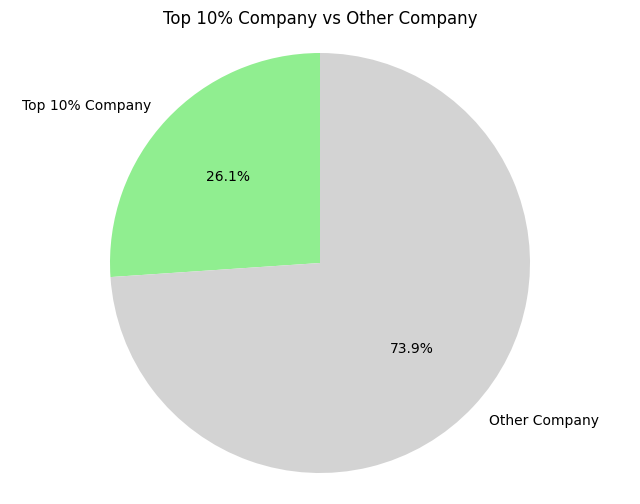

In [ ]:

top_countries_sum = company_counts.head(top_k).sum()

# Sum of all other countries
other_sum = company_counts.iloc[top_n:].sum()

# piechart
pie_data = [top_countries_sum, other_sum]
labels = [f'Top 10% Company', 'Other Company']

# Plot
plt.figure(figsize=(8,6))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightgray'], startangle=90)
plt.title(f'Top 10% Company vs Other Company')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

/tmp/ipykernel_407777/1571771062.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_growth = df_plot.resample('M').size()


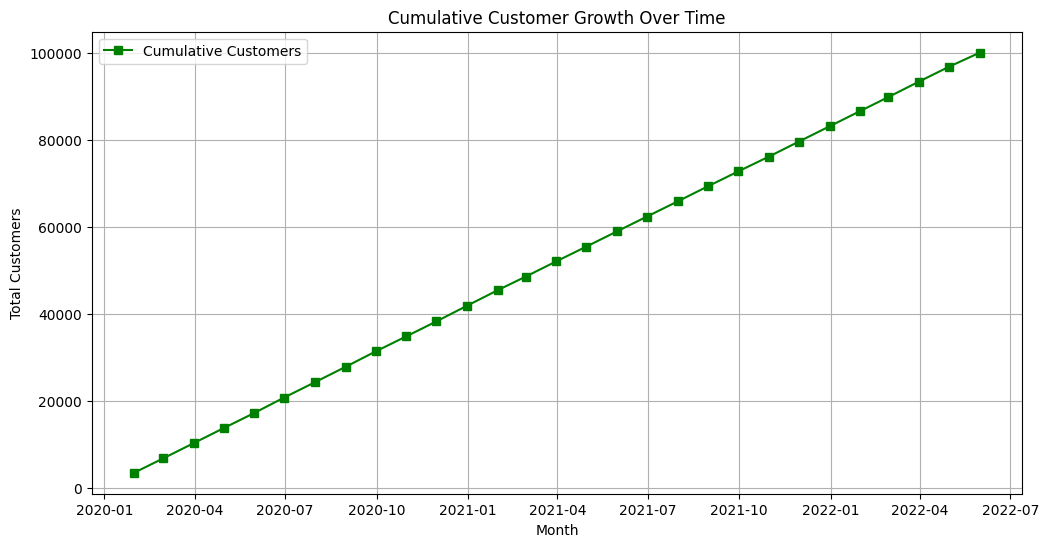

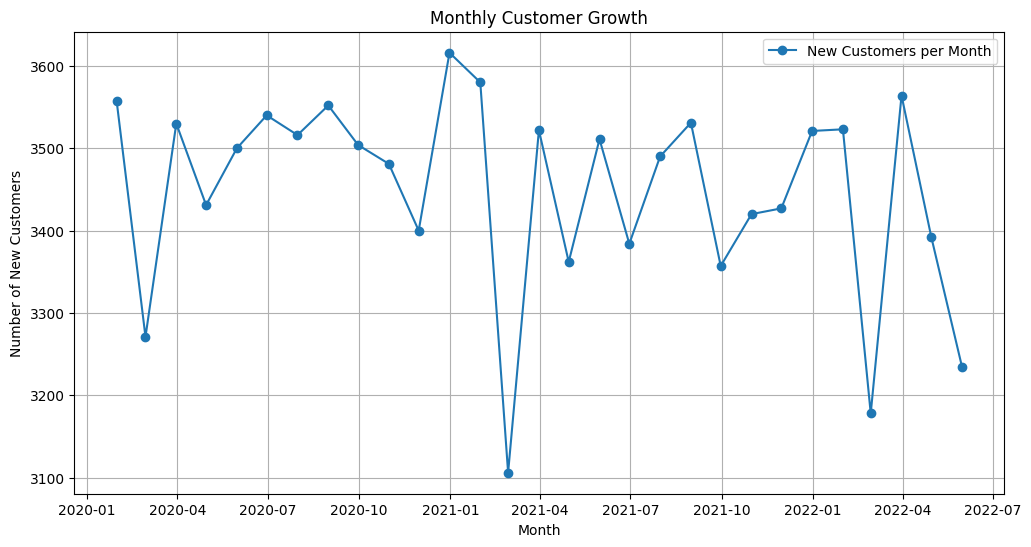

In [ ]:

df_plot = customer_df.copy()

df_plot['Subscription Date'] = pd.to_datetime(df_plot['Subscription Date'])

df_plot = df_plot.set_index('Subscription Date')

monthly_growth = df_plot.resample('M').size()

cumulative_growth = monthly_growth.cumsum()

plt.figure(figsize=(12,6))
plt.plot(cumulative_growth.index, cumulative_growth.values, marker='s', color='green', label='Cumulative Customers')
plt.title('Cumulative Customer Growth Over Time')
plt.xlabel('Month')
plt.ylabel('Total Customers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(monthly_growth.index, monthly_growth.values, marker='o', label='New Customers per Month')
plt.title('Monthly Customer Growth')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
df_plot = customer_df.copy()

df_plot['Subscription Date'] = pd.to_datetime(df_plot['Subscription Date'])
df_plot['YearMonth'] = df_plot['Subscription Date'].dt.to_period('M')

monthly_growth_country = df_plot.groupby(['Country', 'YearMonth']).size().unstack(fill_value=0)

monthly_deviation = monthly_growth_country.sub(monthly_growth_country.mean(axis=1), axis=0)

monthly_deviation.head()



YearMonth,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.620690,-1.379310,-2.379310,0.620690,-4.379310,2.620690,3.620690,-3.379310,4.620690,0.620690,...,-3.379310,1.620690,10.620690,4.620690,3.620690,5.620690,-0.379310,2.620690,-3.379310,-3.379310
Albania,-0.517241,-6.517241,-1.517241,1.482759,0.482759,1.482759,10.482759,-0.517241,-4.517241,-3.517241,...,1.482759,2.482759,0.482759,-6.517241,-6.517241,1.482759,1.482759,-0.517241,-4.517241,0.482759
Algeria,-6.000000,-1.000000,-5.000000,4.000000,-2.000000,-1.000000,1.000000,5.000000,4.000000,6.000000,...,2.000000,-3.000000,-2.000000,4.000000,0.000000,2.000000,-1.000000,6.000000,-4.000000,-1.000000
American Samoa,0.724138,-4.275862,-4.275862,-0.275862,7.724138,3.724138,-2.275862,-1.275862,-1.275862,-3.275862,...,-7.275862,2.724138,5.724138,3.724138,2.724138,-8.275862,0.724138,4.724138,-1.275862,3.724138
Andorra,-1.241379,-0.241379,3.758621,0.758621,0.758621,0.758621,-1.241379,0.758621,1.758621,-2.241379,...,0.758621,-2.241379,-3.241379,-4.241379,4.758621,6.758621,2.758621,1.758621,-4.241379,-2.241379


In [ ]:

df_plot = customer_df.copy()

df_plot['Subscription Date'] = pd.to_datetime(df_plot['Subscription Date'])

df_plot['YearMonth'] = df_plot['Subscription Date'].dt.to_period('M')

monthly_growth = df_plot.groupby('YearMonth').size().sort_index()

top_3_months = monthly_growth.nlargest(3)
print("Top 3 Months by Customer Growth:\n", top_3_months)

bottom_3_months = monthly_growth.nsmallest(3)
print("\nBottom 3 Months by Customer Growth:\n", bottom_3_months)



Top 3 Months by Customer Growth:
 YearMonth
2020-12    3616
2021-01    3580
2022-03    3564
Freq: M, dtype: int64

Bottom 3 Months by Customer Growth:
 YearMonth
2021-02    3106
2022-02    3178
2022-05    3234
Freq: M, dtype: int64


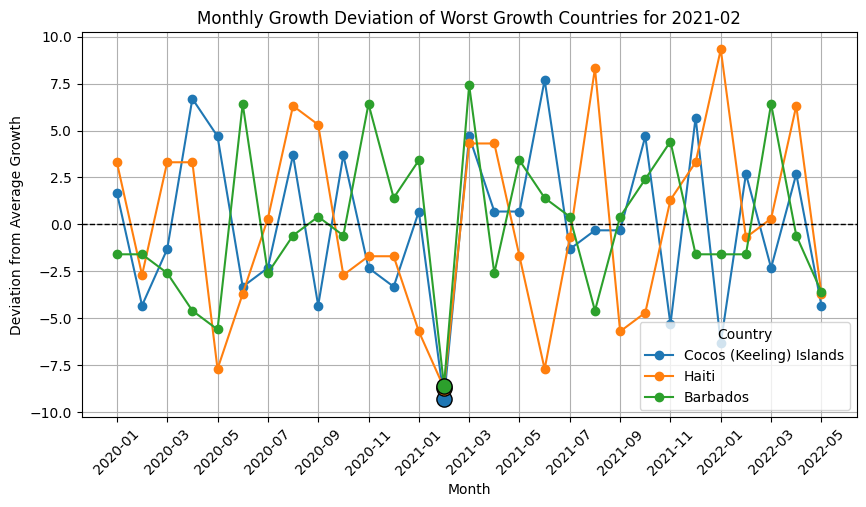

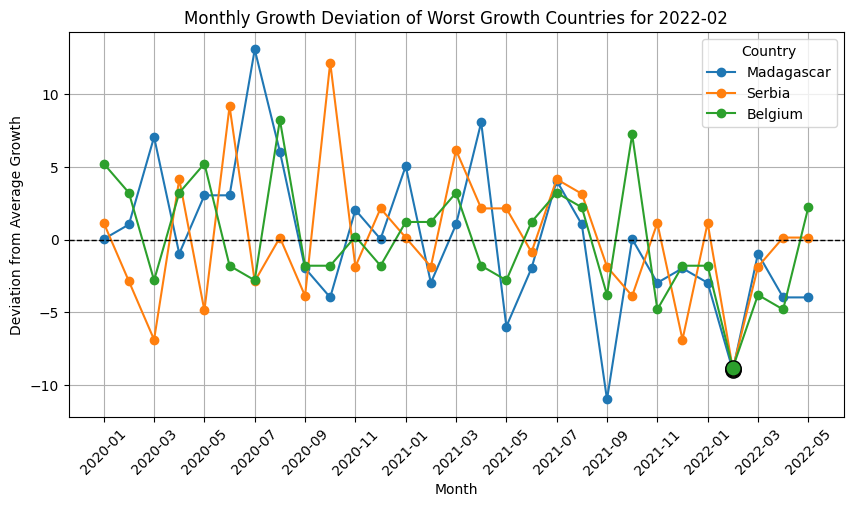

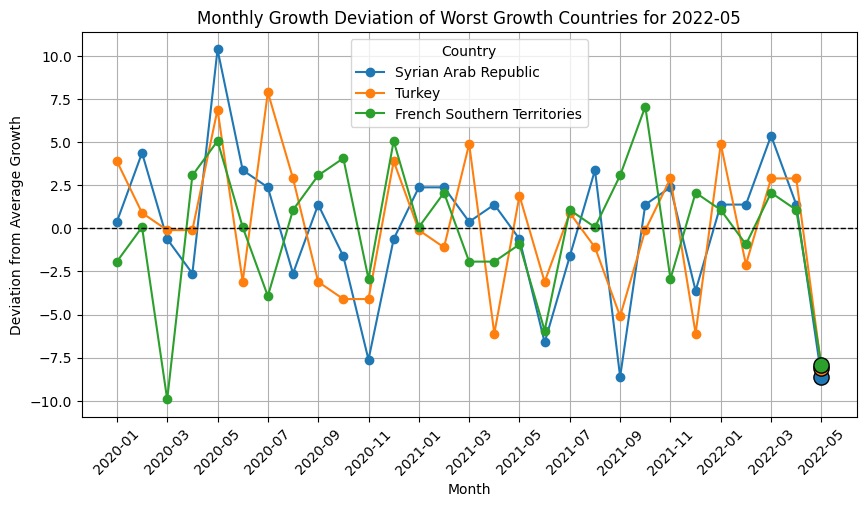

In [ ]:
monthly_deviation_transposed = monthly_deviation.T

def best_worst_countries(df, months):
    month_dict = {}
    for month in months:
        month_data = df.loc[month]
        best_3 = month_data.nlargest(1).index.tolist()   # top 3 countries
        worst_3 = month_data.nsmallest(3).index.tolist() # bottom 3 countries
        month_dict[month] = {
            'Best': best_3,
            'Worst': worst_3
        }
    return month_dict

bottom_records = best_worst_countries(monthly_deviation_transposed, bottom_3_months.index)



all_months = bottom_records.keys()  # months of interest

for month in all_months:
    worst_countries = bottom_records[month]['Worst']  # only worst
    plot_data = monthly_deviation.loc[worst_countries]  # rows = countries, columns = months

    plt.figure(figsize=(10,5))

    colors = sns.color_palette("tab10", n_colors=len(worst_countries))

    for country, color in zip(worst_countries, colors):
        plt.plot(plot_data.columns.astype(str), plot_data.loc[country], marker='o', label=country, color=color)
        plt.scatter(str(month), plot_data.loc[country, month], color=color, s=120, edgecolor='black', zorder=5)

    plt.axhline(0, color='black', linestyle='--', linewidth=1)  # zero line for average growth
    plt.title(f'Monthly Growth Deviation of Worst Growth Countries for {month}')
    plt.xlabel('Month')
    plt.ylabel('Deviation from Average Growth')

    all_month_labels = plot_data.columns.astype(str)
    plt.xticks(all_month_labels[::2], rotation=45) 

    plt.grid(True)
    plt.legend(title='Country')
    plt.show()